### Introduction to Machine Learning
##### 參考資料: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
#### prepared by Chao-Lin Liu

In [40]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

##### Preprocessing Input data
######  這一組數據的答案是： $y_2=0.2x+4$

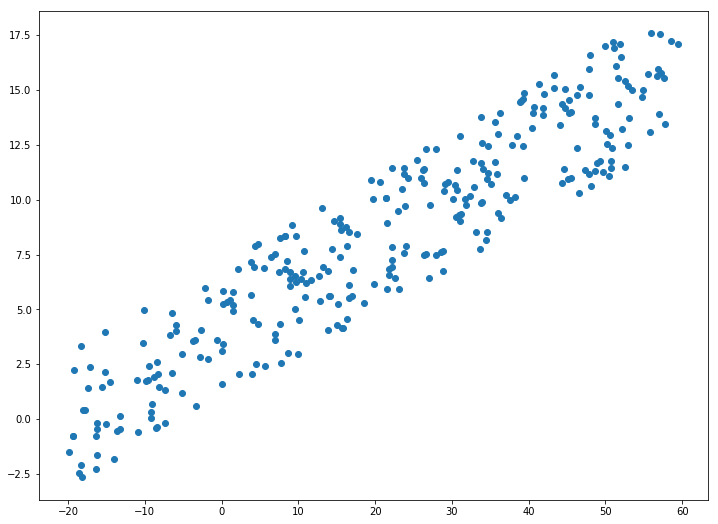

In [41]:
data = pd.read_csv('linear.regression.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 2]
plt.scatter(X, Y)
plt.show()

In [42]:
# initial guess
m = 5
c = -2

In [43]:
X[0:5]

0    12.699206
1   -16.338590
2    16.566408
3    47.881772
4    15.416405
Name: X, dtype: float64

In [44]:
type(X)

pandas.core.series.Series

In [45]:
# 這是一個方便的指令；一個指令完成一個 series 的運算
tempY = m*X + c
tempY[0:5]

0     61.496031
1    -83.692950
2     80.832039
3    237.408862
4     75.082027
Name: X, dtype: float64

In [46]:
Y[0:5]

0     6.539841
1    -0.767718
2     5.513282
3    14.776354
4     7.383281
Name: Y2, dtype: float64

In [47]:
delta = Y - tempY
delta[0:5]

0    -54.956189
1     82.925232
2    -75.318758
3   -222.632507
4    -67.698746
dtype: float64

In [48]:
type(delta)

pandas.core.series.Series

In [49]:
# 一般的 Python list 沒有這樣便利
list1 = [1, 2, 3, 4]
list2 = [2, 4, 6, 8]
#list1 * list2  # 錯誤指令

In [50]:
series1 = pd.Series(list1)
series2 = pd.Series(list2)
type(series1)

pandas.core.series.Series

In [51]:
print("the inner product")
print(series1*series2)
print("the sum")
print(sum(series1*series2))

the inner product
0     2
1     8
2    18
3    32
dtype: int64
the sum
60


## 提示：$\frac{𝜕𝐸}{𝜕𝑤_𝑖}=\frac{2}{𝑛} \sum_{j=1}^n 𝑎_𝑖^𝑗 (\hat{𝑦}_𝑗−𝑦_𝑗)$
## 提示：$w_i = w_i - \lambda \frac{𝜕𝐸}{𝜕𝑤_𝑖}$

In [54]:
# Building the model

L = 0.001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
print(n)

# f(x) = (1/n) sigma(yi' - yi)^2
# => (1/n) sigma(m*xi + c - yi)^2
# df(x)/dm => (1/n) sigma 2*(m*xi + c - yi)*xi
# df(x)/dc => (1/n) sigma 2*(m*xi + c - yi)*1
for i in range(epochs): 
    Y_pred = m*X + c    # The current predicted value of Y
    D_m = (2/n)*np.sum((Y_pred - Y)*X)  # 相當於做 X_1 的微分，但是這裡依賴數據的誤差資訊
    D_c = (2/n)*np.sum((Y_pred - Y)*1)  # 相當於做 X_0 的微分，但是這裡依賴數據的誤差資訊；
    m = m - L * D_m             # Update m
    c = c - L * D_c             # Update c
    Y_pred = m*X + c

print (m, c)

300.0
0.20667775427947874 3.900389352928937


#### 應該看到
0.2066813200395493 3.900231706569465

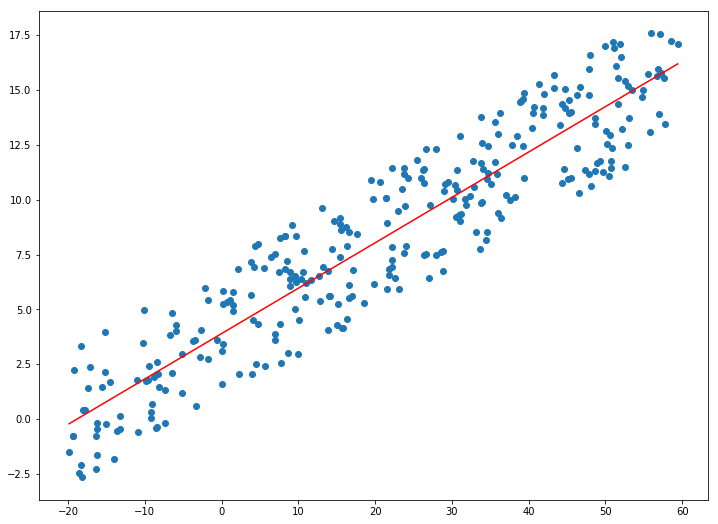

In [55]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()